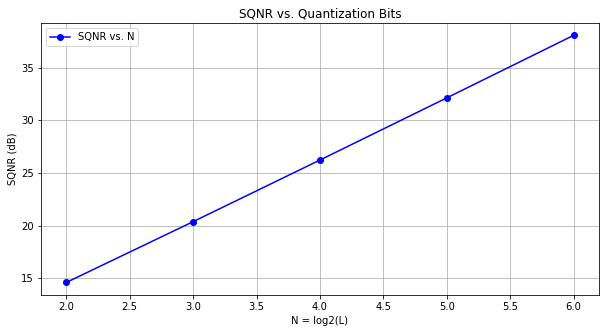

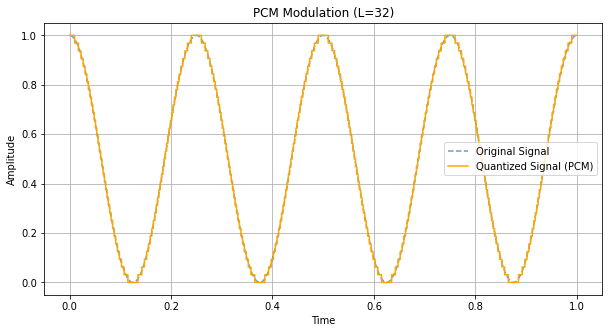

In [2]:
import numpy as np
import matplotlib.pyplot as plt

STUDENT_ROLL_NO = 25

# Pulse Coded Modulation Parameters
fs = 32000  # Sampling at 4 times Nyquist Rate
t = np.linspace(0, 1, fs)

mod_r = STUDENT_ROLL_NO % 5 + 1  # Calculate mod(r,5)+1

s_t = mod_r * (1 + np.cos(8 * np.pi * t)) / 2  # Input signal

# Quantization Levels L
L_values = [4, 8, 16, 32, 64]

# SQNR Calculation
SQNR = []
for L in L_values:
    delta = (max(s_t) - min(s_t)) / L  # Correct step size
    q_levels = np.round((s_t - min(s_t)) / delta) * delta + min(s_t)  # Quantization
    noise = s_t - q_levels  # Quantization noise
    sqnr = 10 * np.log10(np.var(s_t) / np.var(noise))  # SQNR in dB
    SQNR.append(sqnr)

# a) Plot SQNR vs. N
N_values = np.log2(L_values)
plt.figure(figsize=(10, 5))
plt.plot(N_values, SQNR, 'bo-', label='SQNR vs. N')
plt.xlabel('N = log2(L)')
plt.ylabel('SQNR (dB)')
plt.title('SQNR vs. Quantization Bits')
plt.legend()
plt.grid()
plt.show()

# Quantization for L = 32
L = 32
delta = (max(s_t) - min(s_t)) / L  # Corrected Step Size
q_levels = np.round((s_t - min(s_t)) / delta) * delta + min(s_t)  # Correct Quantization

# Corrected Binary Encoding
indices = np.clip(((q_levels - min(s_t)) / delta).astype(int), 0, L-1)  # Ensure values are within range
binary_encoded = [format(i, '05b') for i in indices]  # Convert to 5-bit binary

# Plot original and quantized signals
plt.figure(figsize=(10, 5))
plt.plot(t, s_t, label="Original Signal", linestyle="dashed", alpha=0.7)
plt.step(t, q_levels, label="Quantized Signal (PCM)", where='mid', color="orange")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("PCM Modulation (L=32)")
plt.legend()
plt.grid()
plt.show()

# # Print first 10 binary encoded values
# print("PCM Binary Encoding for L=32:")
# print(binary_encoded[:10])
